In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/Users/DericoDehnielsen/Downloads/traindata.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

The variables presented in the training dataset above are:

1. PassengerId = Id of the passenger who were available in the Titanic
2. Survived = 1 for survived and 0 for not survived
3. Pclass = Ticket Class
4. Name = Name of passengers
5. Sex = Male/Female
6. Age = Age of passengers
7. SibSp = Number of siblings/spouses aboard
8. Parch = Number of parents/children aboard
9. Ticket = Ticket number
10. Fare = Price of ticket
11. Embarked = Port of Embarkation

These are the variables to determine whether a passenger will survive in the test dataset

feature engineering

In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)

In [8]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [10]:
train_data['Alone'] = 1
train_data['Alone'].loc[train_data['FamilySize']>1] = 0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [12]:
male = pd.get_dummies(train_data['Sex'], drop_first=True)
train_data['Sex'] = male
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Alone
0,0,3,1,22.0,7.2500,S,2,0
1,1,1,0,38.0,71.2833,C,2,0
2,1,3,0,26.0,7.9250,S,1,1
3,1,1,0,35.0,53.1000,S,2,0
4,0,3,1,35.0,8.0500,S,1,1


let's do the same to the test dataset

In [13]:
test_data = pd.read_csv('/Users/DericoDehnielsen/Downloads/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data['Alone'] = 1
test_data['Alone'].loc[test_data['FamilySize']>1] = 0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
test_male = pd.get_dummies(test_data['Sex'], drop_first=True)
test_data['Sex'] = test_male
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

visualize the train data

Text(0.5, 1.0, 'Survival count for solo passengers')

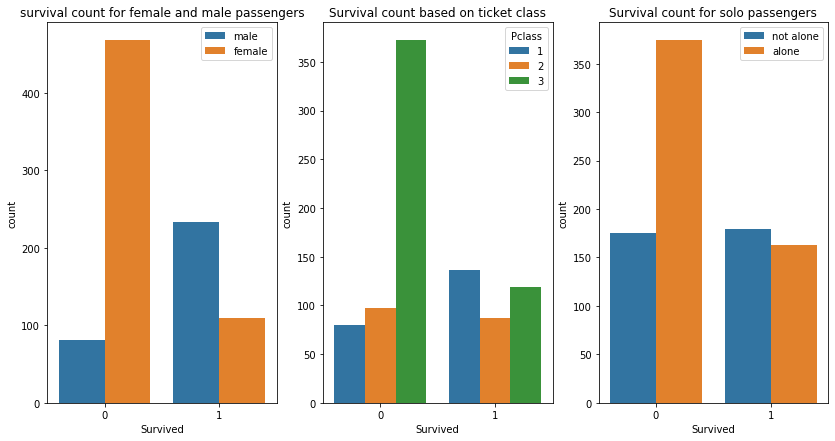

In [17]:
import seaborn as sns

fig = plt.figure(figsize=(14,7))

ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

sns.countplot('Survived', hue='Sex', data=train_data,ax=ax0)
ax0.legend(['male', 'female'])
ax0.set_title('survival count for female and male passengers')

sns.countplot('Survived', hue='Pclass', data=train_data, ax=ax1)
ax1.set_title('Survival count based on ticket class')

sns.countplot('Survived', hue='Alone', data=train_data, ax=ax2)
ax2.legend(['not alone', 'alone'])
ax2.set_title('Survival count for solo passengers')

(-50, 250)

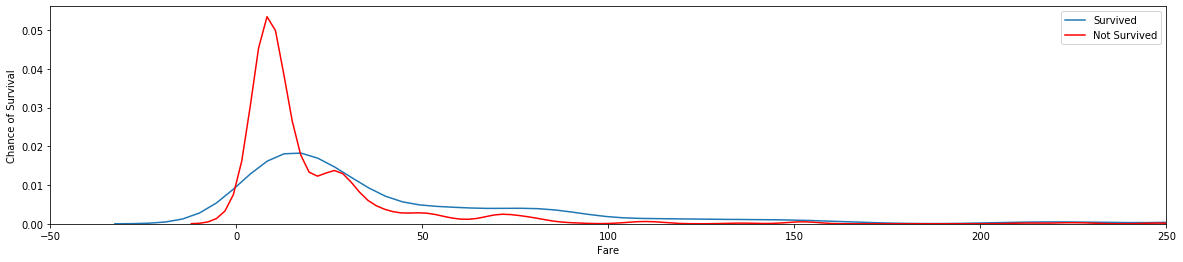

In [18]:
fig = plt.figure(figsize=(20,4))
ax0 = fig.add_subplot(111)

sns.distplot(train_data['Fare'].loc[train_data['Survived']==1], hist=False,ax=ax0, label='Survived')
sns.distplot(train_data['Fare'].loc[train_data['Survived']!=1], hist=False, color='r',ax=ax0, label='Not Survived')
ax0.set_ylabel('Chance of Survival')
ax0.set_xlabel('Fare')
ax0.set_xlim([-50,250])

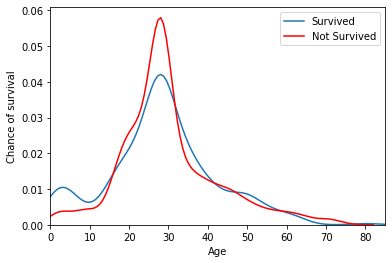

In [19]:
fig=plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

sns.distplot(train_data['Age'].loc[train_data['Survived']==1], hist=False, label='Survived')
sns.distplot(train_data['Age'].loc[train_data['Survived']!=1], hist=False, color='r', label='Not Survived')
ax1.set_xlim([0,max(train_data['Age']+5)])
ax1.set_ylabel('Chance of survival')
plt.show()

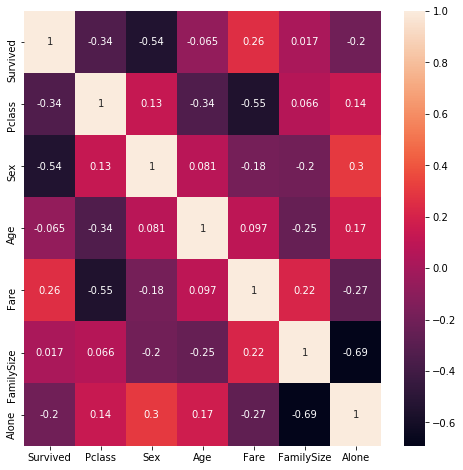

In [20]:
fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(111)

sns.heatmap(pd.DataFrame.corr(train_data), annot=True, ax=ax2)

encode the 'embarked' column with onehotencoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
encoded_embarked = cat_encoder.fit_transform(train_data[['Embarked']])
encoded_embarked.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [22]:
cat_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

attributes = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Alone']

embarked_pipeline = ColumnTransformer([
        ('standard scaler', StandardScaler(), attributes),
        ('embarked', OneHotEncoder(), ['Embarked'])
])

prepared_train_data = embarked_pipeline.fit_transform(train_data.drop('Survived', axis=1))
train_target = train_data['Survived']

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [25]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LinearSVC', LinearSVC(max_iter=10000)))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, prepared_train_data, train_target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(),3)} ({round(cv_results.std(),3)})')

LR: 0.799 (0.028)
KNN: 0.813 (0.036)
LDA: 0.795 (0.032)
RF: 0.805 (0.041)
TREE: 0.788 (0.043)
NB: 0.779 (0.056)
SVM: 0.828 (0.04)
LinearSVC: 0.797 (0.031)


from the simple training model above, the 3 best machine learning algorithms for this case are support vector machine, 
KNeighborsClassifier, and Random forest Classifier

In [26]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
kernel_params = ['poly', 'rbf', 'linear']
degree_params = list(range(1,6))
c_params = [0.001, 0.01, 0.1, 1, 10]
gamma_params = [0.1,1,3,5]

param_grid_svc = dict(kernel= kernel_params, degree= degree_params, C = c_params, gamma = gamma_params)

In [28]:
SVM = SVC()

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

grid_svc = RandomizedSearchCV(SVM, param_distributions = param_grid_svc, n_iter=10, cv=5, scoring='accuracy')

grid_svc.fit(prepared_train_data, train_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.1, 1, 3, 5],
                                        'kernel': ['poly', 'rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [29]:
df_svc = pd.DataFrame(grid_svc.cv_results_)
df_svc[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.643098,0.013534,"{'kernel': 'linear', 'gamma': 0.1, 'degree': 1..."
1,0.828278,0.023221,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 5, '..."
2,0.828278,0.023221,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, '..."
3,0.823784,0.014583,"{'kernel': 'poly', 'gamma': 0.1, 'degree': 3, ..."
4,0.616163,0.002325,"{'kernel': 'poly', 'gamma': 0.1, 'degree': 2, ..."


In [30]:
grid_svc.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'degree': 5, 'C': 1}

In [31]:
final_svc = SVC(degree=5, kernel='rbf', C=1, gamma=0.1, probability=True)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(prepared_train_data, train_target, test_size=0.25)

In [33]:
final_svc.fit(X_train, y_train)
y_pred_svc = final_svc.predict(X_test)

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

def score(true,pred):
    print(f'precision score: {precision_score(true, pred)}')
    print(f'recall score: {recall_score(true, pred)}')
    print(f'accuracy score: {accuracy_score(true,pred)}')
                              
score(y_test, y_pred_svc)

precision score: 0.8
recall score: 0.6511627906976745
accuracy score: 0.8026905829596412


modelling with kneighbors classifier

In [34]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [35]:
knn = KNeighborsClassifier()

n_neighbors_params = list(range(1,101))
leaf_size_params = [10,20,30,40,50]
weight_options = ['uniform', 'distance']
algorithm_params = ['auto', 'ball_tree', 'kd_tree', 'brute']

param_grid_knn = dict(n_neighbors=n_neighbors_params, weights = weight_options, algorithm = algorithm_params, leaf_size=leaf_size_params)

grid_knn = GridSearchCV(knn, param_grid = param_grid_knn, cv=10, scoring='accuracy')

grid_knn.fit(prepared_train_data, train_target)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
df_knn = pd.DataFrame(grid_knn.cv_results_)
df_knn[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.757703,0.054017,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
1,0.757703,0.054017,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
2,0.786854,0.042531,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
3,0.761086,0.056364,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
4,0.801473,0.050721,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."


In [37]:
grid_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}

In [38]:
final_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=10)

final_knn.fit(X_train, y_train)
y_pred_knn = final_knn.predict(X_test)

score(y_test, y_pred_knn)

precision score: 0.7228915662650602
recall score: 0.6976744186046512
accuracy score: 0.7802690582959642


modelling with random forest classifier

In [39]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
rf = RandomForestClassifier()

n_estimators_params = [int(n) for n in np.linspace(10,1000,15)]
max_features_params = ['auto', 'sqrt']
max_leaf_nodes_params = [2,4,8,16,20]
max_depth_params = [int(x) for x in np.linspace(10,100,10)]
min_samples_split_params = [2,5,10]

# to reduce computing time, let's try using randomizedsearchcv

from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = dict(n_estimators = n_estimators_params,
    max_features = max_features_params,
    max_leaf_nodes = max_leaf_nodes_params,
    max_depth = max_depth_params,
    min_samples_split = min_samples_split_params)

grid_rf = RandomizedSearchCV(rf, param_distributions = param_grid_rf, cv=10, n_iter = 25,scoring='accuracy')

grid_rf.fit(prepared_train_data, train_target)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [41]:
df_rf = pd.DataFrame(grid_rf.cv_results_)
df_rf[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.796829,0.036526,"{'n_estimators': 10, 'min_samples_split': 5, '..."
1,0.830574,0.049143,"{'n_estimators': 363, 'min_samples_split': 10,..."
2,0.772260,0.038498,"{'n_estimators': 575, 'min_samples_split': 5, ..."
3,0.829451,0.047409,"{'n_estimators': 222, 'min_samples_split': 5, ..."
4,0.824919,0.042680,"{'n_estimators': 717, 'min_samples_split': 2, ..."


In [42]:
grid_rf.best_params_

{'n_estimators': 434,
 'min_samples_split': 10,
 'max_leaf_nodes': 20,
 'max_features': 'auto',
 'max_depth': 60}

In [43]:
final_rf = RandomForestClassifier(n_estimators= 434,
 min_samples_split= 10,
 max_leaf_nodes= 20,
 max_features= 'auto',
 max_depth= 60)

final_rf.fit(X_train, y_train)
y_pred_rf = final_rf.predict(X_test)
score(y_test, y_pred_rf)

precision score: 0.7733333333333333
recall score: 0.6744186046511628
accuracy score: 0.7982062780269058


let's compare these machine learning algorithms with voting classifier

In [113]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('svm', final_svc), ('knn', final_knn), ('rf', final_rf)],
                             voting='soft')

for clf in (final_svc, final_knn, final_rf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8026905829596412
KNeighborsClassifier 0.7802690582959642
RandomForestClassifier 0.7892376681614349
VotingClassifier 0.7982062780269058


final classifier algorithm = voting classifier

apply the algorithm to predict whether a passenger will survive based on their attributes in the test data

In [50]:
X_test_data = test_data.drop('PassengerId', axis=1)

In [51]:
prepared_test_data = embarked_pipeline.fit_transform(X_test_data)

voting_clf.fit(prepared_train_data, train_target)
final_pred = voting_clf.predict_proba(prepared_test_data)

In [55]:
df_final = pd.DataFrame()
df_final['PassengerId'] = test_data['PassengerId']
df_final['Survived'] = final_pred[:,1]

In [56]:
df_final

,PassengerId,Survived
0,892,0.158988
1,893,0.392099
2,894,0.166896
3,895,0.294107
4,896,0.451398
...,...,...
413,1305,0.293856
414,1306,0.935082
415,1307,0.153952
416,1308,0.293856


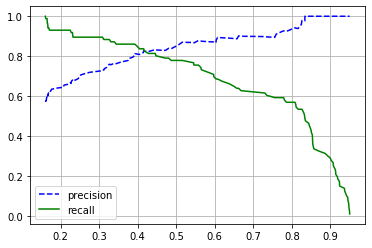

In [60]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, voting_clf.predict_proba(X_test)[:,1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.legend()
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) 

In [110]:
final_submission = (voting_clf.predict_proba(prepared_test_data)[:,1] >= 0.445).astype(int)

In [111]:
df = pd.DataFrame()
df['PassengerId'] = test_data['PassengerId']
df['Survived'] = final_submission

df['Survived'].value_counts()

0    270
1    148
Name: Survived, dtype: int64

In [112]:
df.to_csv('finalsubmission.csv', index=False)

Placed 2812 out of 20552 submissions (Sunday, 16 August 2020 15.37) - top 14%

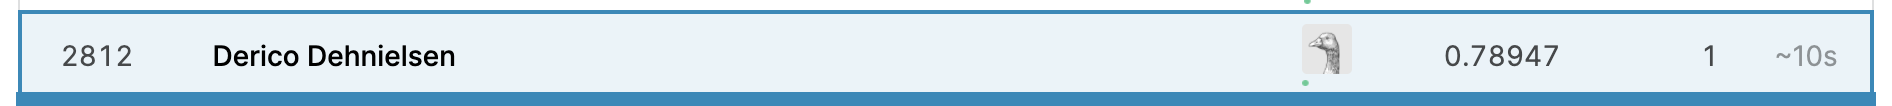

In [76]:
from PIL import Image

ff = Image.open('/Users/DericoDehnielsen/desktop/Screen Shot 2020-08-16 at 15.37.27.png')
ff